In [ ]:
# set the Kaggle API credentials path:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d bwandowando/all-these-people-dont-exist

In [ ]:
!unzip all-these-people-dont-exist.zip # unzip the dataset

In [18]:
# import the necessary libraries:
import os
import pathlib
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# load the dataset:
dataset_url = "/content/ThisPersonDoesNotExist/ThisPersonDoesNotExist"
data_dir = pathlib.Path(dataset_url)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

5333


In [3]:
batch_size = 32
img_height = 512
img_width = 512

In [4]:
# create the training dataset:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5333 files belonging to 2 classes.
Using 4267 files for training.


In [5]:
# create the validation dataset:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5333 files belonging to 2 classes.
Using 1066 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Female', 'Male']


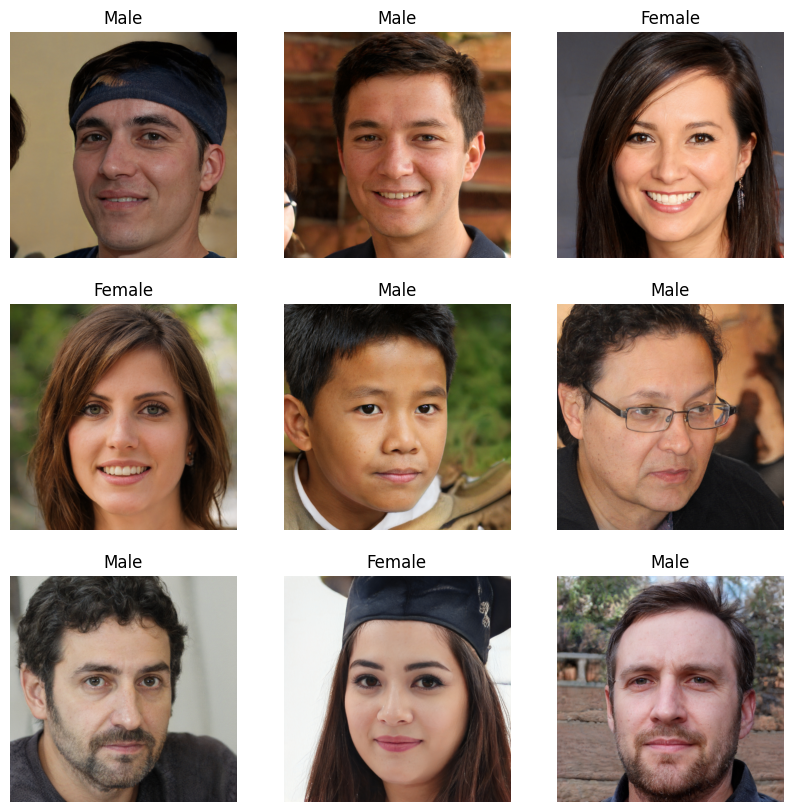

In [7]:
# visualize the data:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# check the shape of the data:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 512, 512, 3)
(32,)


In [10]:
# normalize the data:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9941177


In [11]:
num_classes = len(class_names)
# create the architecture of the model:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
# compile the model:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [13]:
# train the model:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
134/134 [==============================] - 212s 1s/step - loss: 0.5137 - accuracy: 0.7806 - val_loss: 0.3524 - val_accuracy: 0.8452
Epoch 2/10
134/134 [==============================] - 196s 1s/step - loss: 0.2672 - accuracy: 0.8847 - val_loss: 0.3115 - val_accuracy: 0.8734
Epoch 3/10
134/134 [==============================] - 196s 1s/step - loss: 0.1629 - accuracy: 0.9276 - val_loss: 0.2597 - val_accuracy: 0.9006
Epoch 4/10
134/134 [==============================] - 192s 1s/step - loss: 0.0877 - accuracy: 0.9655 - val_loss: 0.3625 - val_accuracy: 0.9024
Epoch 5/10
134/134 [==============================] - 199s 1s/step - loss: 0.1000 - accuracy: 0.9651 - val_loss: 0.3985 - val_accuracy: 0.8762
Epoch 6/10
134/134 [==============================] - 197s 1s/step - loss: 0.0420 - accuracy: 0.9850 - val_loss: 0.4771 - val_accuracy: 0.8818
Epoch 7/10
134/134 [==============================] - 197s 1s/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.5977 - val_accuracy: 0.8902

In [27]:
# visualize the training results:
img_path = 'image.png'
img = image.load_img(img_path, target_size=(512, 512))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predicted_index = tf.argmax(predictions, axis=1)[0]
predicted_class = class_names[predicted_index]
print(predicted_class)

1/1 [==============================] - 0s 21ms/step
Male
